In [12]:
import anndata as ad 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import scanpy as sc

from lab_scripts.utils import utils
utils.change_directory_to_repo()

In [2]:
adt = ad.read_h5ad('data/official/match_modality/openproblems_bmmc_cite_phase2_mod2/openproblems_bmmc_cite_phase2_mod2.censor_dataset.output_train_mod1.h5ad')

In [6]:
adt.obs['batch'].value_counts()

s3d7    10362
s3d6     9977
s2d1     9353
s2d5     8206
s1d3     5484
s2d4     5026
s1d1     4721
s1d2     4464
Name: batch, dtype: int64

In [13]:
depth = adt.layers['counts'].sum(axis=1)

In [14]:
adt.obs['depth'] = depth

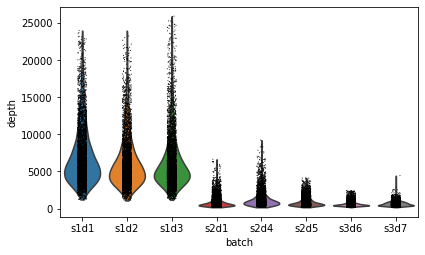

In [15]:
sc.pl.violin(adt, keys=['depth'], groupby='batch')

In [16]:
normalized_depth = adt.X.sum(axis=1)
adt.obs['normalized_depth'] = normalized_depth

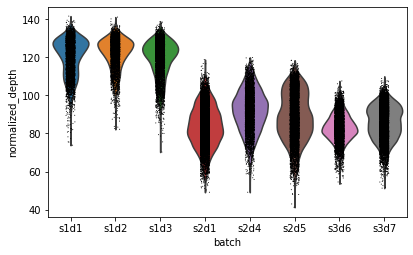

In [17]:
sc.pl.violin(adt, keys=['normalized_depth'], groupby='batch')

In [18]:
gex = ad.read_h5ad('data/official/match_modality/openproblems_bmmc_cite_phase2_mod2/openproblems_bmmc_cite_phase2_mod2.censor_dataset.output_train_mod2.h5ad')

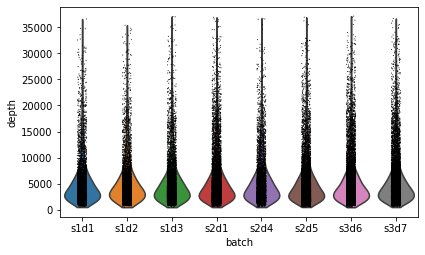

In [26]:
gex.obs['depth'] = gex.layers['counts'].sum(axis=1)
sc.pl.violin(gex, keys=['depth'], groupby='batch')

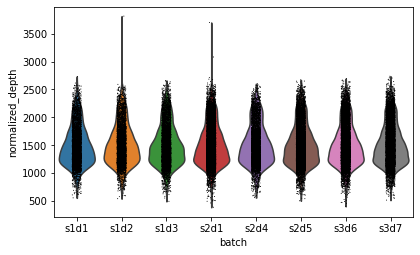

In [27]:
gex.obs['normalized_depth'] = gex.X.sum(axis=1)
sc.pl.violin(gex, keys=['normalized_depth'], groupby='batch')